In [122]:
import pandas as pd
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
import matplotlib.ticker as ticker

birth_rates_df = pd.read_csv("data/us_births_2016_2021.csv")
new_df = pd.read_csv('data/Natality, 2007-2021.txt',header=0,delimiter="\t")

In [139]:
new_df1 = new_df.drop(columns=['Notes', 'Year Code', 'State Code'])
new_df1

,State,Year,Marital Status,Marital Status Code,Tobacco Use,Tobacco Use Code,Diabetes,Diabetes Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother
0,Alabama,2007,Married,1,Not Reported,10,Yes,1,2016,0.00%,3333.52,30.25
1,Alabama,2007,Married,1,Not Reported,10,No,2,37845,0.06%,3244.50,27.61
2,Alabama,2007,Married,1,Not Reported,10,Unknown or Not Stated,9,103,0.00%,3325.40,26.62
3,Alabama,2007,Unmarried,2,Not Reported,10,Yes,1,786,0.00%,3183.51,26.50
4,Alabama,2007,Unmarried,2,Not Reported,10,No,2,24016,0.04%,3055.34,22.92
...,...,...,...,...,...,...,...,...,...,...,...,...
8170,Wyoming,2021,Unmarried,2,Yes,1,No,2,348,0.00%,3007.87,26.24
8171,Wyoming,2021,Unmarried,2,No,2,Yes,1,99,0.00%,3155.60,28.46
8172,Wyoming,2021,Unmarried,2,No,2,No,2,1416,0.00%,3129.75,25.08
8173,Wyoming,2021,Unmarried,2,Unknown or Not Stated,9,Yes,1,11,0.00%,3167.00,29.91


In [159]:
df1 = new_df1.drop(columns=['State', 'Average Birth Weight', 'Tobacco Use', 'Tobacco Use Code', 'Diabetes', 'Diabetes Code', '% of Total Births', 'Marital Status Code', 'Diabetes']).reset_index()
df1_cleaned = df1.groupby(['Year', 'Marital Status']).agg({"Births":'sum', 'Average Age of Mother':'median'}).reset_index()
#z4_cleaned= z4_cleaned.sort_values('Education Level Code', ascending=True)
df1_totalbirths = df1_cleaned.groupby('Year')['Births'].sum()


In [170]:
df2 = new_df1.drop(columns=['State', 'Tobacco Use', 'Tobacco Use Code', 'Diabetes Code', 'Marital Status Code', 'Marital Status', '% of Total Births','Average Birth Weight']).reset_index()
df2_diabetes = df2.groupby(['Year', 'Diabetes']).agg({"Births":'sum', 'Average Age of Mother':'median'}).reset_index()

Text(0.5, 1.0, 'Number of U.S. Births by Cases of Diabetes\n2008-2021')

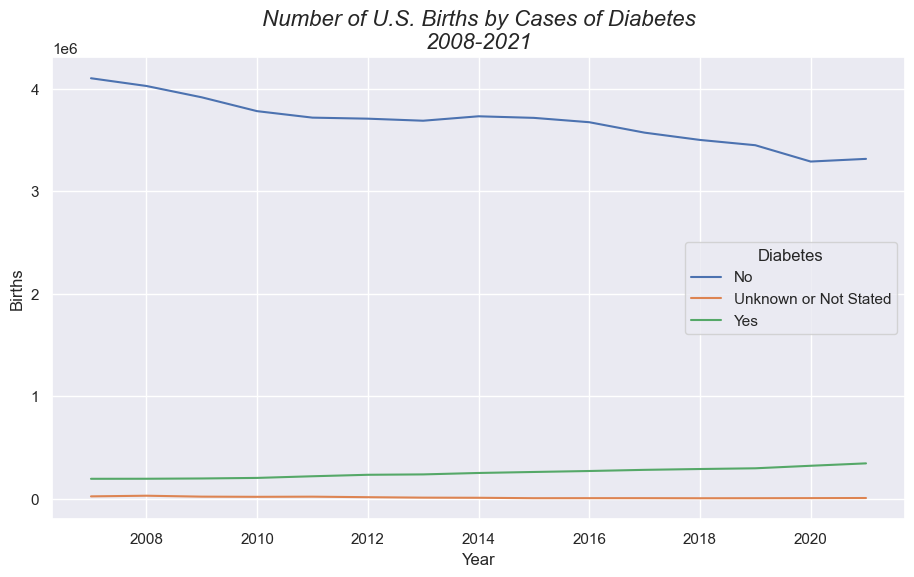

In [183]:
sns.set_theme()

f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(df2_diabetes, x = 'Year', y= 'Births', hue='Diabetes')

ax.set_title("Number of U.S. Births by Cases of Diabetes\n2008-2021", style= 'italic', fontsize=16)

In [175]:
df3 = new_df1.drop(columns=['State', 'Diabetes', 'Tobacco Use Code', 'Diabetes Code', 'Marital Status Code', 'Marital Status', '% of Total Births','Average Birth Weight']).reset_index()
df3_tobacco = df3.groupby(['Year', 'Tobacco Use']).agg({"Births":'sum', 'Average Age of Mother':'median'}).reset_index()

Text(0.5, 1.0, 'Number of U.S. Births by Tobacco Use\n2008-2021')

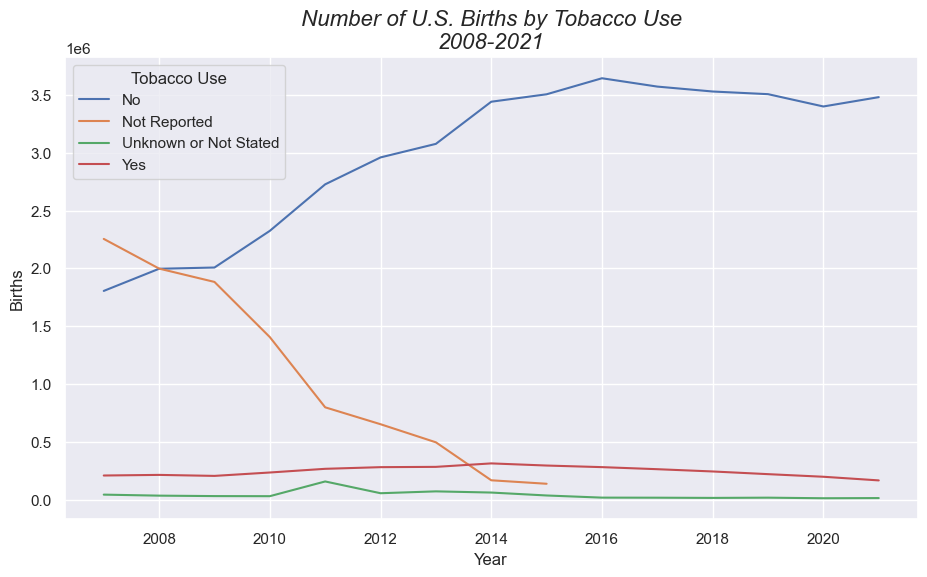

In [182]:
sns.set_theme()

f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(df3_tobacco, x = 'Year', y= 'Births', hue='Tobacco Use')
ax.set_title("Number of U.S. Births by Tobacco Use\n2008-2021", style= 'italic', fontsize=16)

Text(0.5, 1.0, 'Number of U.S. Births\n2008-2021')

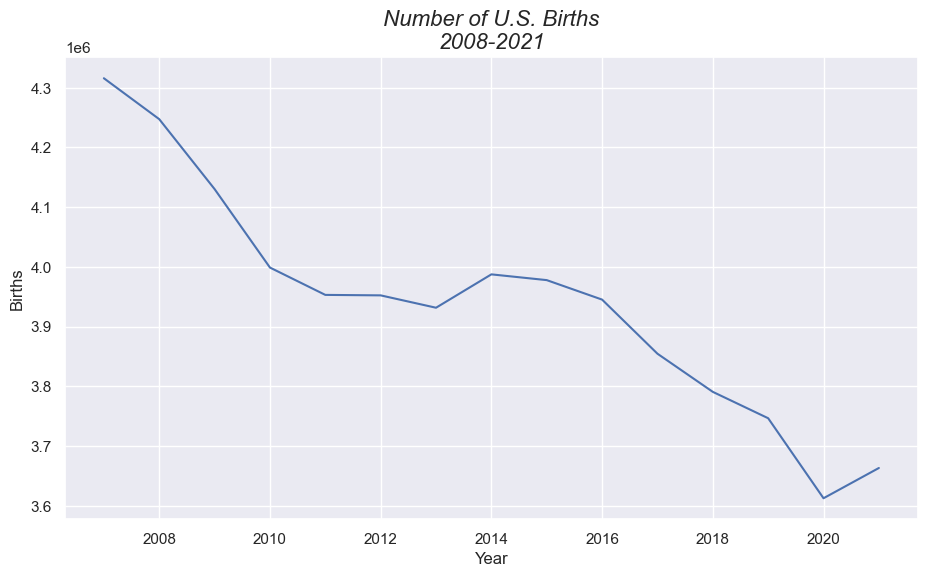

In [180]:
sns.set_theme()

f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(df1_totalbirths)
ax.set_title("Number of U.S. Births\n2008-2021", style= 'italic', fontsize=16)

Text(0.5, 1.0, 'Number of Births by Marital Status\n2008-2021')

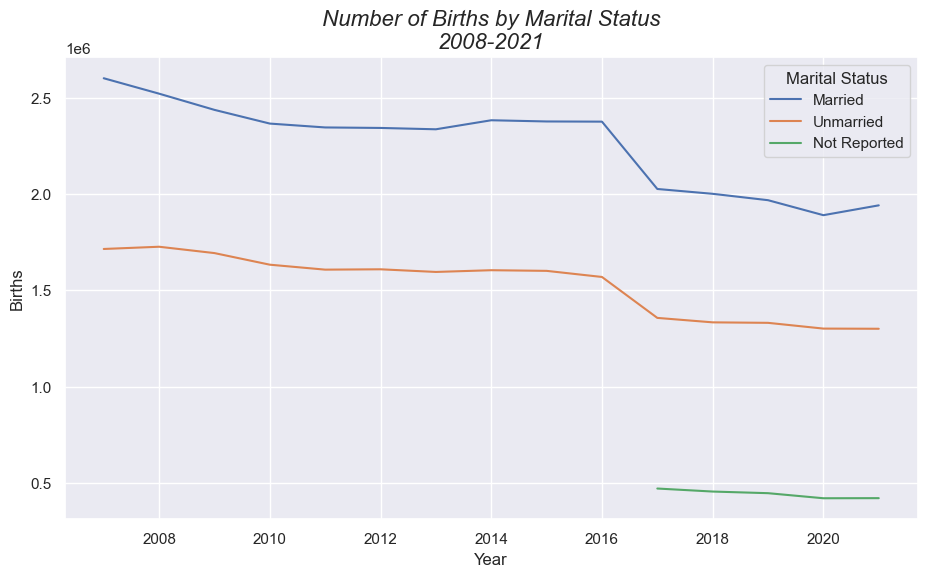

In [178]:
sns.set_theme()

f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(df1_cleaned, x = 'Year', y= 'Births', hue='Marital Status')
ax.set_title("Number of Births by Marital Status\n2008-2021", style= 'italic', fontsize=16)

In [33]:
z4 = birth_rates_df.drop(columns=["Gender", 'State', 'Average Birth Weight (g)', 'State Abbreviation']).reset_index()
z4_cleaned = z4.groupby(['Year', 'Education Level of Mother', 'Education Level Code']).agg({"Number of Births":'sum', 'Average Age of Mother (years)':'mean'}).reset_index()
z4_cleaned= z4_cleaned.sort_values('Education Level Code', ascending=True)

In [5]:
w_gender = birth_rates_df.drop(columns=['State', 'Average Birth Weight (g)', 'State Abbreviation']).reset_index()
w_gender_cleaned = w_gender.groupby(['Year','Gender', 'Education Level of Mother', 'Education Level Code']).agg({"Number of Births":'sum', 'Average Age of Mother (years)':'mean'}).reset_index()

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_42695/1268178422.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);


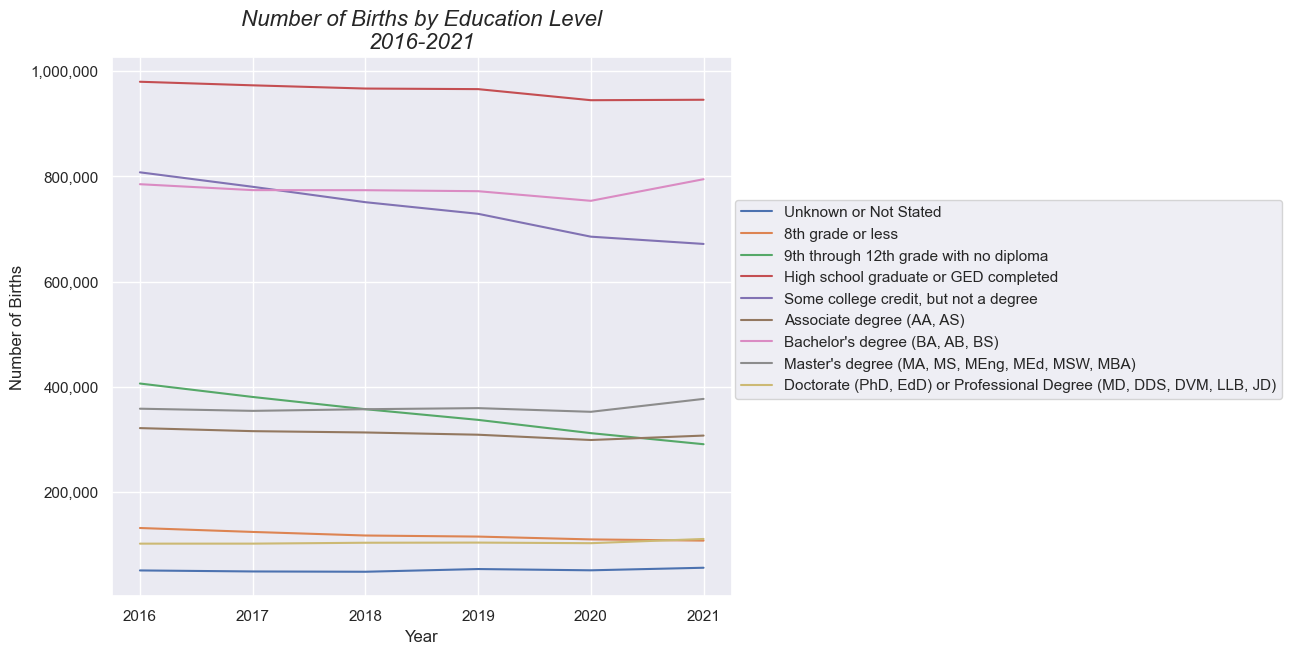

In [138]:
sns.set_theme()

f, ax = plt.subplots()
sns.lineplot(z4_cleaned,x= 'Year', y= 'Number of Births', hue="Education Level of Mother")
ax.set_title("Number of Births by Education Level\n2016-2021", style= 'italic', fontsize=16)
f.set_size_inches(8, 7)
pos = ax.get_position()
ax.legend(loc='upper right', bbox_to_anchor=(1.90, .75))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);

In [8]:
z2 = birth_rates_df.drop(columns=["Gender", 'Education Level of Mother', 'State', "State Abbreviation"]).groupby('Year').sum().reset_index()

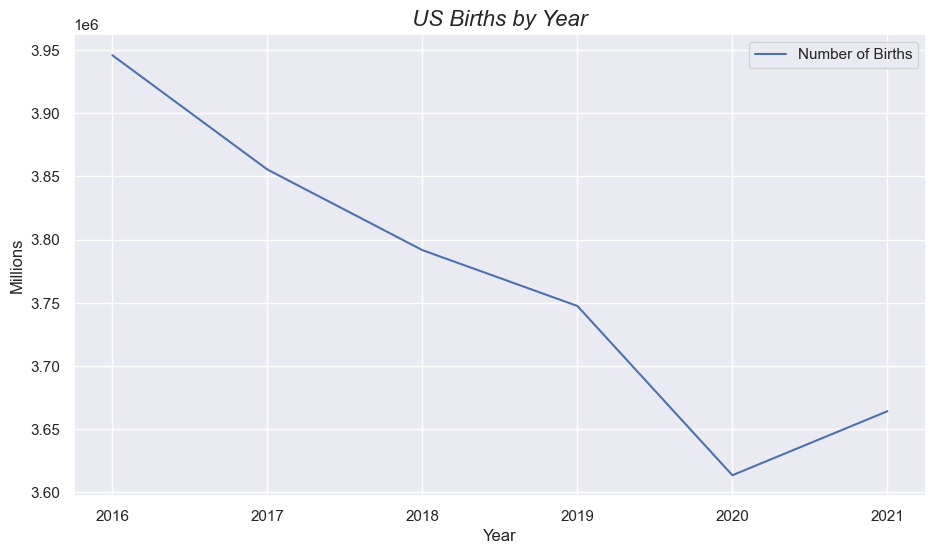

In [9]:
f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(z2,x= 'Year', y= 'Number of Births', label='Number of Births')
ax.set_title("US Births by Year", style= 'italic', fontsize=16)
ax.set_ylabel('Millions')
ax.legend().set_visible(True)

#current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values]);

In [10]:
w_gender = birth_rates_df.drop(columns=['State', 'Average Birth Weight (g)', 'State Abbreviation']).reset_index()
w_gender_cleaned = w_gender.groupby(['Year','Gender', 'Education Level of Mother', 'Education Level Code']).agg({"Number of Births":'sum', 'Average Age of Mother (years)':'mean'}).reset_index()
new_gender_cleaned= w_gender_cleaned.drop(columns=['Education Level Code', 'Average Age of Mother (years)', 'Education Level of Mother'])
new_gender_cleaned = new_gender_cleaned.groupby(['Year', 'Gender']).sum().reset_index()

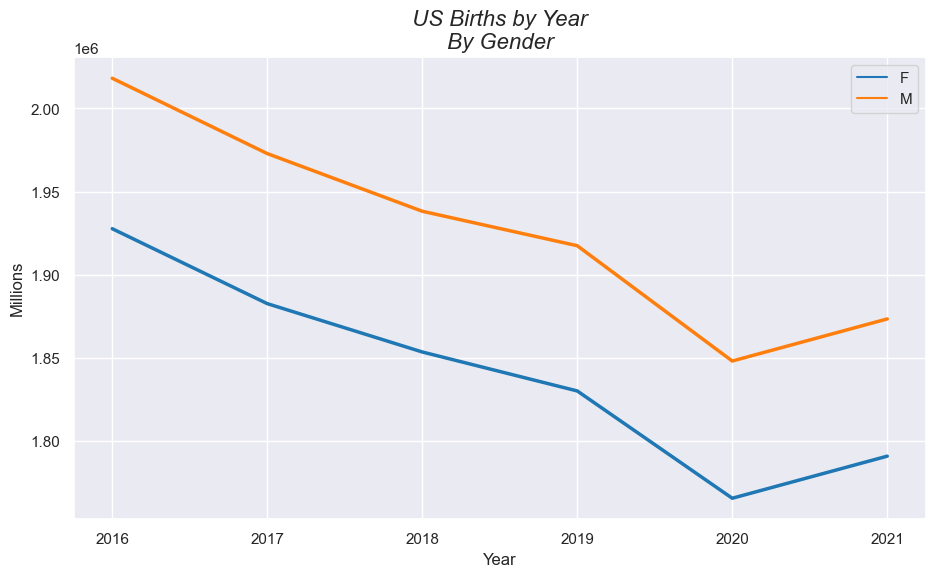

In [11]:
f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=new_gender_cleaned, x='Year', y="Number of Births",hue='Gender', palette="tab10", linewidth=2.5)
ax.set_title("US Births by Year\nBy Gender", style= 'italic', fontsize=16)
ax.set_ylabel('Millions')
ax.legend().set_visible(True)

In [32]:
z4 = birth_rates_df.drop(columns=["Gender", 'State', 'Average Birth Weight (g)', 'State Abbreviation']).reset_index()
z4_cleaned = z4.groupby(['Year', 'Education Level of Mother', 'Education Level Code']).agg({"Number of Births":'sum', 'Average Age of Mother (years)':'median'}).reset_index()
z4_cleaned= z4_cleaned.sort_values(by = ['Year', 'Education Level Code'], ascending = [True, True])

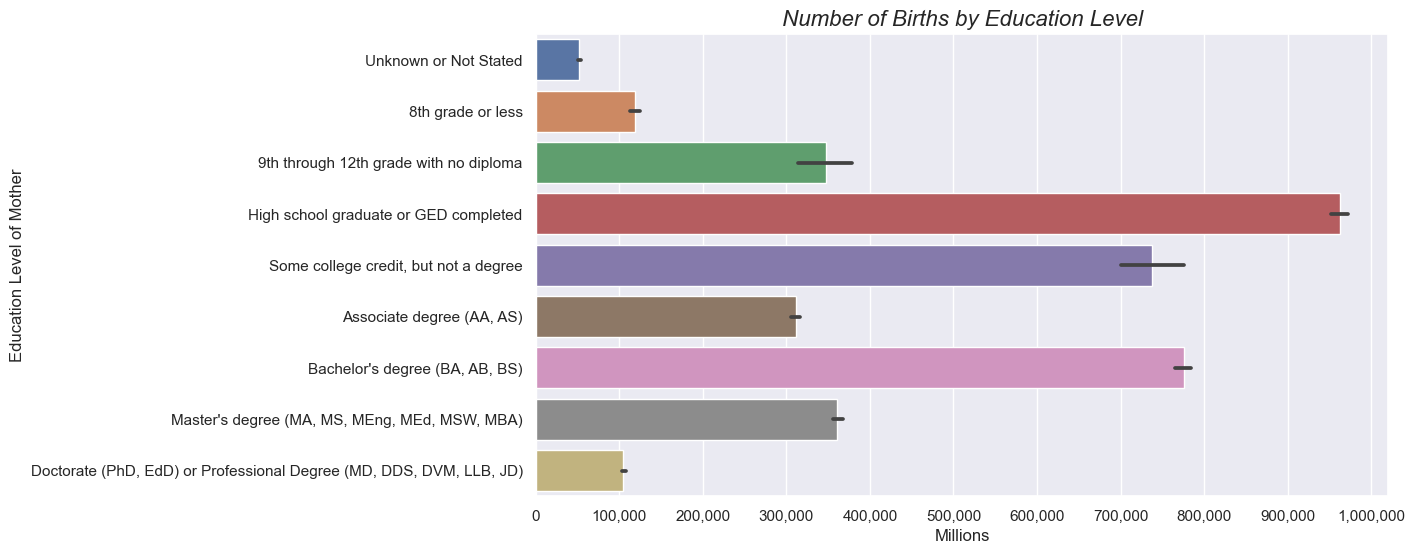

In [31]:
f, ax = plt.subplots(figsize=(11, 6))
sns.barplot(data=z4_cleaned, y="Education Level of Mother", x="Number of Births")


#sns.lineplot(data=new_gender_cleaned, x='Year', y="Number of Births",hue='Gender', palette="tab10", linewidth=2.5)
ax.set_title("Number of Births by Education Level", style= 'italic', fontsize=16)
ax.set_xlabel('Millions')
#ax.legend().set_visible(True)
ax.xaxis.set_ticks(np.arange(0, 1100000, 100000))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_42695/1700072225.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


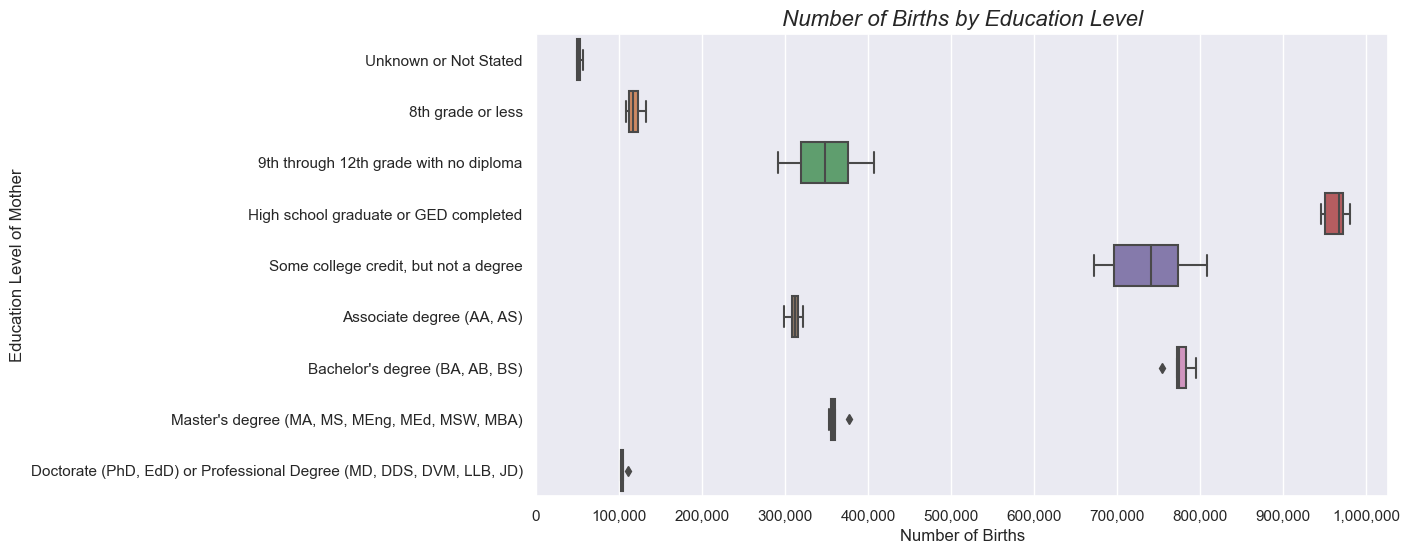

In [30]:
f, ax = plt.subplots(figsize=(11, 6))
sns.boxplot(data=z4_cleaned, y="Education Level of Mother", x="Number of Births")


#sns.lineplot(data=new_gender_cleaned, x='Year', y="Number of Births",hue='Gender', palette="tab10", linewidth=2.5)
ax.set_title("Number of Births by Education Level", style= 'italic', fontsize=16)
#ax.set_xlabel('Millions')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

ax.xaxis.set_ticks(np.arange(0, 1100000, 100000))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

In [55]:
weight = birth_rates_df.drop(columns=["Gender", 'State', 'State Abbreviation', 'Education Level of Mother', 'Education Level Code']).reset_index()
w_cleaned = weight.groupby(['Year', 'Average Age of Mother (years)']).agg({"Number of Births":'sum', 'Average Birth Weight (g)': 'mean'}).reset_index()
w_cleaned= w_cleaned.sort_values('Average Birth Weight (g)', ascending=True)
z= []
for grams in w_cleaned['Average Birth Weight (g)']:
    z.append(grams / 453.6)
z
w_cleaned['Average Birth Weight (lbs)'] = z
#w_cleaned['Average Age of Mother (years)'] = w_cleaned['Average Age of Mother (years)'].round()
w_cleaned

,Year,Average Age of Mother (years),Number of Births,Average Birth Weight (g),Average Birth Weight (lbs)
462,2020,23.6,1731,2980.60,6.570988
118,2017,23.5,2028,2997.10,6.607363
347,2019,23.7,1011,3032.80,6.686067
583,2021,24.3,5095,3036.50,6.694224
623,2021,28.3,3343,3037.22,6.695811
...,...,...,...,...,...
345,2018,35.3,542,3394.10,7.482584
116,2016,34.9,553,3402.10,7.500220
198,2017,31.5,12399,3404.15,7.504740
331,2018,33.5,2193,3412.25,7.522597


/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_42695/851475716.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=w_cleaned, x='Average Age of Mother (years)', y="Average Birth Weight (lbs)", palette="tab10", linewidth=2.5)


<Axes: xlabel='Average Age of Mother (years)', ylabel='Average Birth Weight (lbs)'>

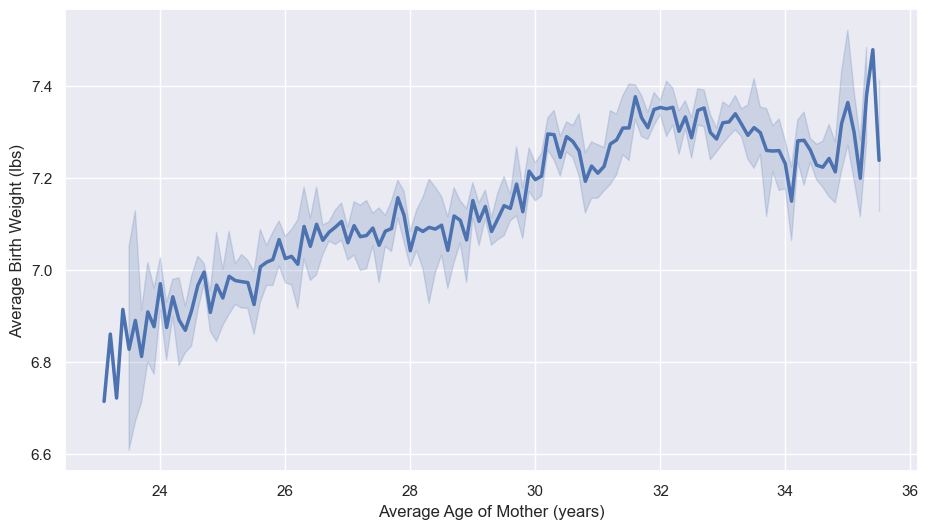

In [53]:
f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=w_cleaned, x='Average Age of Mother (years)', y="Average Birth Weight (lbs)", palette="tab10", linewidth=2.5)
##ax.set_title("US Births by Year\nBy Gender", style= 'italic', fontsize=16)
#ax.set_ylabel('Millions')
#ax.legend().set_visible(True)

#hue='Average Age of Mother (years)'

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_42695/1805190773.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=w_cleaned, x='Year', y="Average Birth Weight (lbs)", palette="tab10", linewidth=2.5)


<Axes: xlabel='Year', ylabel='Average Birth Weight (lbs)'>

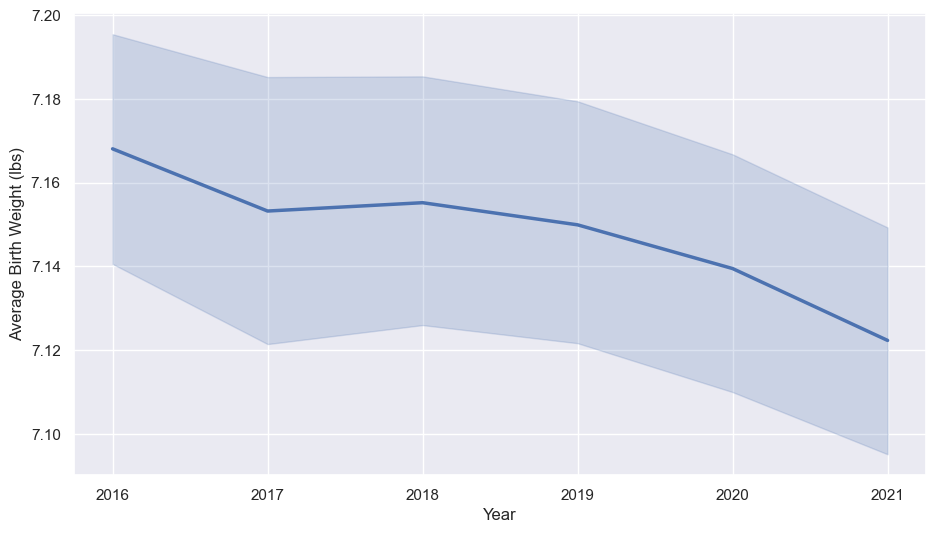

In [54]:
f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=w_cleaned, x='Year', y="Average Birth Weight (lbs)", palette="tab10", linewidth=2.5)

In [124]:
w_cleaned['Average Age of Mother (years)'] = w_cleaned['Average Age of Mother (years)'].round()
w_cleaned['Average Birth Weight (lbs)'] = w_cleaned['Average Birth Weight (lbs)'].round(2)
w_cleaned = w_cleaned.groupby(['Year', 
                               'Average Age of Mother (years)']
                               ).agg({"Number of Births":'sum',
                                'Average Birth Weight (g)': 'mean',
                                'Average Birth Weight (lbs)': 'mean'}).reset_index()
w_cleaned['Average Age of Mother (years)'] = w_cleaned['Average Age of Mother (years)'].astype(int)
w_cleaned


,Year,Average Age of Mother (years),Number of Births,Average Birth Weight (g),Average Birth Weight (lbs)
0,2016,23,7816,3098.677778,6.83
1,2016,24,129247,3162.538939,6.97
2,2016,25,293533,3168.621799,6.99
3,2016,26,530254,3206.548351,7.07
4,2016,27,656681,3238.235174,7.14
...,...,...,...,...,...
73,2021,32,355569,3308.187496,7.29
74,2021,33,358463,3306.223908,7.29
75,2021,34,180176,3286.827732,7.24
76,2021,35,39774,3286.963095,7.25


/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_42695/534040700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


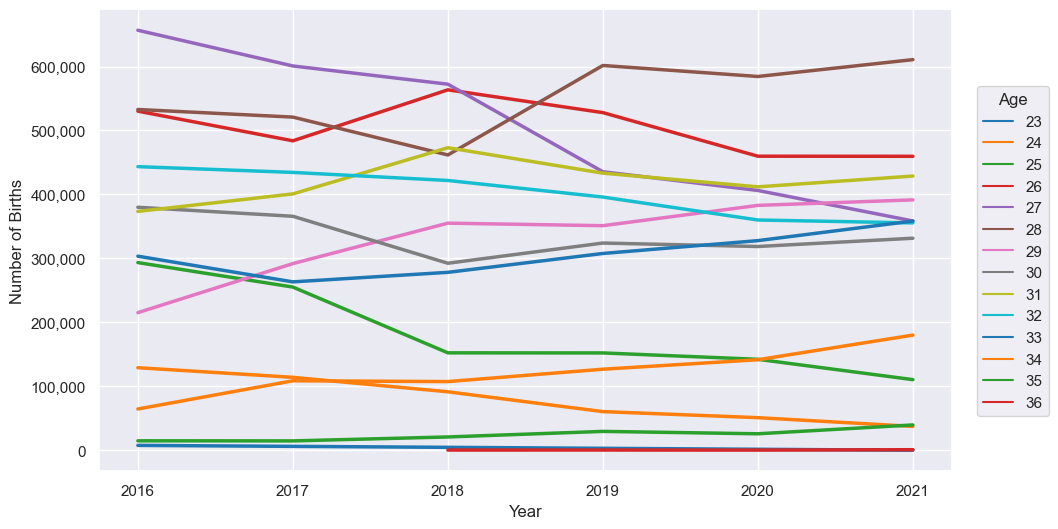

In [136]:
sns.set_theme()

f, ax = plt.subplots()
sns.lineplot(data=w_cleaned,x='Year', y='Number of Births', hue='Average Age of Mother (years)', palette="tab10", linewidth=2.5)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
f.set_size_inches(11, 6)
pos = ax.get_position()
ax.legend(loc='upper right', bbox_to_anchor=(1.123, .85), title='Age');

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_42695/704987774.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);


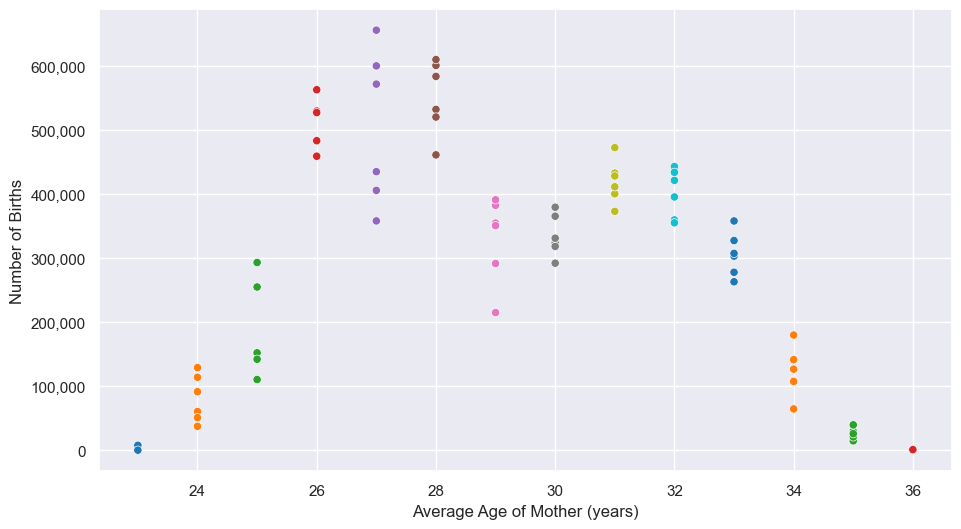

In [119]:
f, ax = plt.subplots(figsize = (11, 6))
sns.scatterplot(data=w_cleaned, y='Number of Births', x='Average Age of Mother (years)', hue='Average Age of Mother (years)', palette="tab10")
ax.legend().set_visible(False)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);

In [117]:
w_cleaned['Average Age of Mother (years)'] = w_cleaned['Average Age of Mother (years)'].astype(int)
w_cleaned


,Year,Average Age of Mother (years),Number of Births,Average Birth Weight (g),Average Birth Weight (lbs)
0,2016,23,7816,3098.677778,6.83
1,2016,24,129247,3162.538939,6.97
2,2016,25,293533,3168.621799,6.99
3,2016,26,530254,3206.548351,7.07
4,2016,27,656681,3238.235174,7.14
...,...,...,...,...,...
73,2021,32,355569,3308.187496,7.29
74,2021,33,358463,3306.223908,7.29
75,2021,34,180176,3286.827732,7.24
76,2021,35,39774,3286.963095,7.25


/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_42695/916915209.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


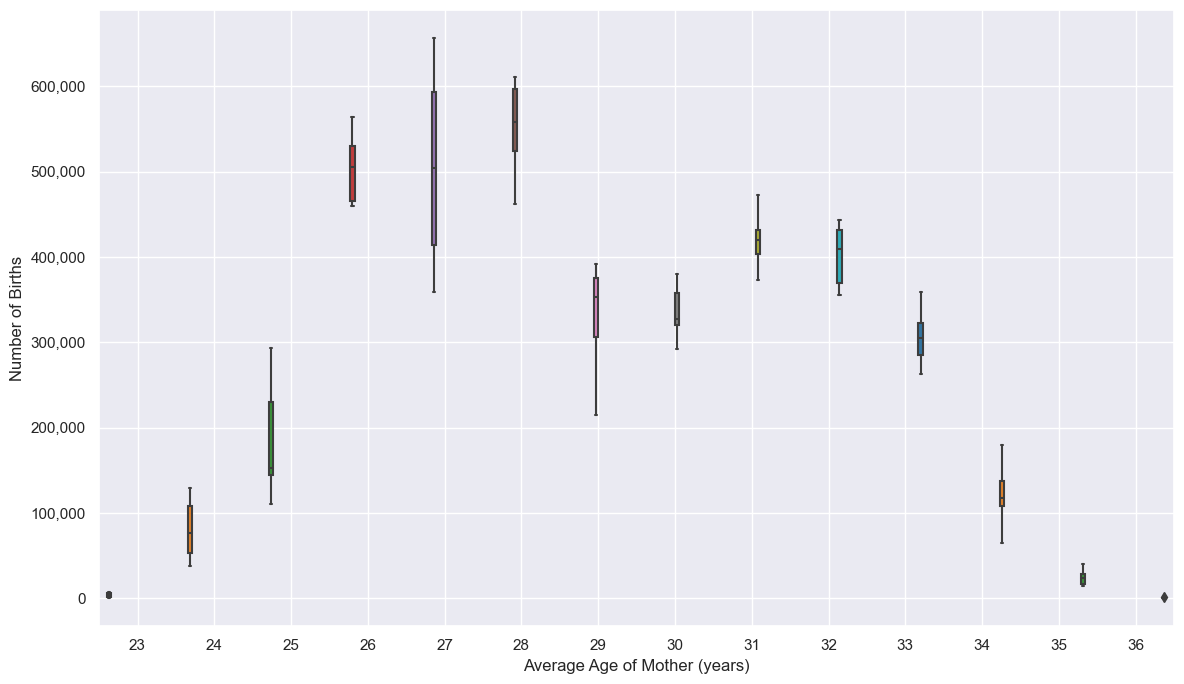

In [118]:
f, ax = plt.subplots(figsize = (12, 7))
sns.boxplot(data=w_cleaned, y='Number of Births', x='Average Age of Mother (years)', hue='Average Age of Mother (years)', palette="tab10")
ax.legend().set_visible(False)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
#current_values2 = plt.gca().get_xticks()
#plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values2])
#start, end = ax.set_xlim(20, 40)
#ax.set_xlim(20., 40.)
#ax.xaxis.set_ticks(np.arange(start, 40, 2))
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
f.tight_layout()
ax.grid(visible=True);